In [1]:
# Import necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Load the dataset
data = pd.read_csv("./../datafiles/diabetes.csv")

# Split the dataset into features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize the Random Forest classifier with 10 decision trees
rf_classifier = RandomForestClassifier(n_estimators=5, random_state=42)

In [7]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [8]:
# Predict on the test data
y_pred = rf_classifier.predict(X_test)

In [9]:
# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [10]:
# Display the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[80 19]
 [19 36]]


In [11]:
# Display classification report

print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [12]:
# Example input data for prediction (sample patient information)
sample_input = [[5, 120, 72, 25, 100, 32.0, 0.5, 45]]  # Example values

In [13]:
# Predict the outcome for the given sample input
sample_prediction = rf_classifier.predict(sample_input)

In [14]:
# Display the prediction result
print("\nPrediction for sample input:", sample_prediction[0])


Prediction for sample input: 0


Textual representation of the decision tree:
 |--- BMI <= 29.15
|   |--- DiabetesPedigreeFunction <= 1.12
|   |   |--- Age <= 27.50
|   |   |   |--- BMI <= 22.75
|   |   |   |   |--- class: 0.0
|   |   |   |--- BMI >  22.75
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.40
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.40
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.40
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.40
|   |   |   |   |   |   |--- Glucose <= 147.50
|   |   |   |   |   |   |   |--- BMI <= 23.00
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- BMI >  23.00
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Glucose >  147.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |--- Age >  27.50
|   |   |   |--- BMI <= 26.35
|   |   |   |   |--- Insulin <= 122.00
|   |   |   |   |   |--- BMI <= 9.65
|   |   |   |   | 

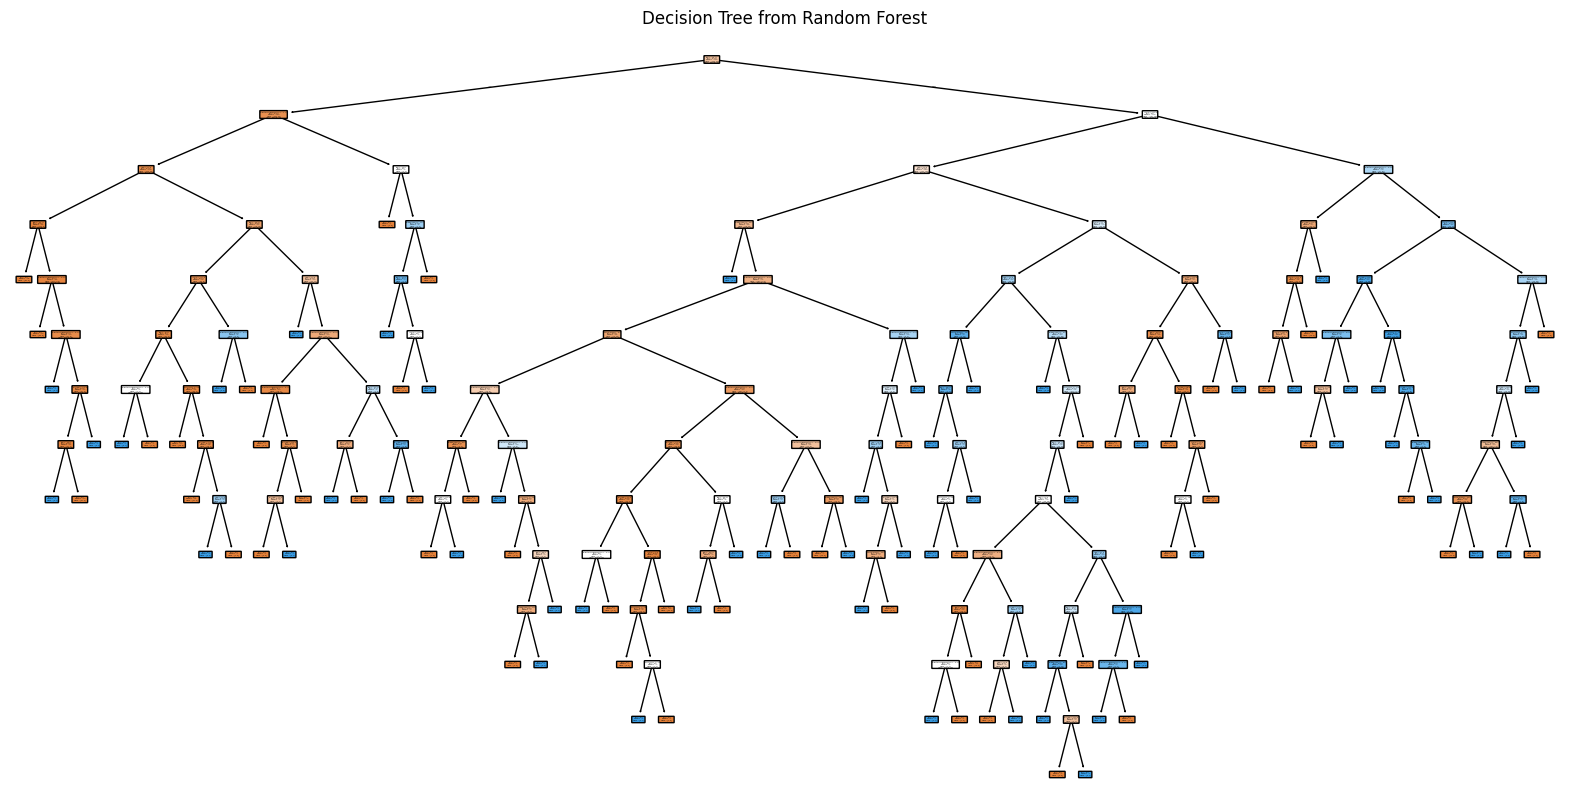

In [15]:
# Import necessary libraries
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Extract the first decision tree from the random forest
first_tree = rf_classifier.estimators_[3]

# Textual representation of the first tree
tree_rules = export_text(first_tree, feature_names=list(X.columns))
print("Textual representation of the decision tree:\n", tree_rules)

# Plot the first tree
plt.figure(figsize=(20, 10))
plot_tree(
    first_tree,
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree from Random Forest")
plt.show()


Regression in Random Forest

In [16]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [17]:
# Initialize the Random Forest Regressor with 110 decision trees
rf_regressor = RandomForestRegressor(n_estimators=300, random_state=42)

In [18]:
# Train the regressor on the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [19]:
# Predict on the test data
y_pred_regressor = rf_regressor.predict(X_test)

In [20]:
# Round predictions to interpret them as 0 or 1 (classification-style)
y_pred_rounded = [round(pred) for pred in y_pred_regressor]

In [21]:
# Calculate the Mean Squared Error (for regression metrics)
mse = mean_squared_error(y_test, y_pred_regressor)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.16741067821067823


In [22]:
# Generate confusion matrix and classification report for rounded predictions
conf_matrix = confusion_matrix(y_test, y_pred_rounded)
class_report = classification_report(y_test, y_pred_rounded)

In [23]:
# Display the results
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[78 21]
 [18 37]]


In [24]:
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

